# Multi Linear Regression Problem
50 Startups have information on their research and development expenditures, their management expenditures, their marketing expenditures, the amount of profit they earned and the location where they were established. The aim is to estimate the amount of profit. This is a numerical estimation problem and our dependent variable is "Profit".

# Lets import and include the required libraries such as numpy, matplotlib.pyplot, pandas and seaborn 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Let's assign our data frame in the directory to the startups variable. Let's start using the startups variable by copying it to the df variable.
startups = pd.read_csv('50_Startups.csv')
df = startups

In [3]:
#Let's print the first 5 observations.
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# Let's display the information of the data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
# Let's display how many observations and attributes it consists of.
df.shape

(50, 5)

In [6]:
#Let's check the missing data.
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Let's plot the correlation matrix.

In [7]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Let's plot the heatmap of the correlation matrix with Seaborn.

<AxesSubplot:>

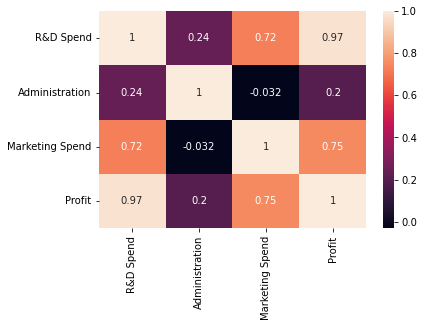

In [8]:
sns.heatmap(df.corr(), annot = True)

# Let's draw a scatterplot to better see the correlation between R&D Spend and Profit.

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

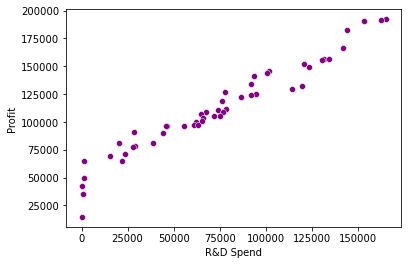

In [9]:
sns.scatterplot(x="R&D Spend",y="Profit",data=df,color="purple")

# Let's plot a histogram over df to see the distribution of numerical variables.

array([[<AxesSubplot:title={'center':'R&D Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing Spend'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

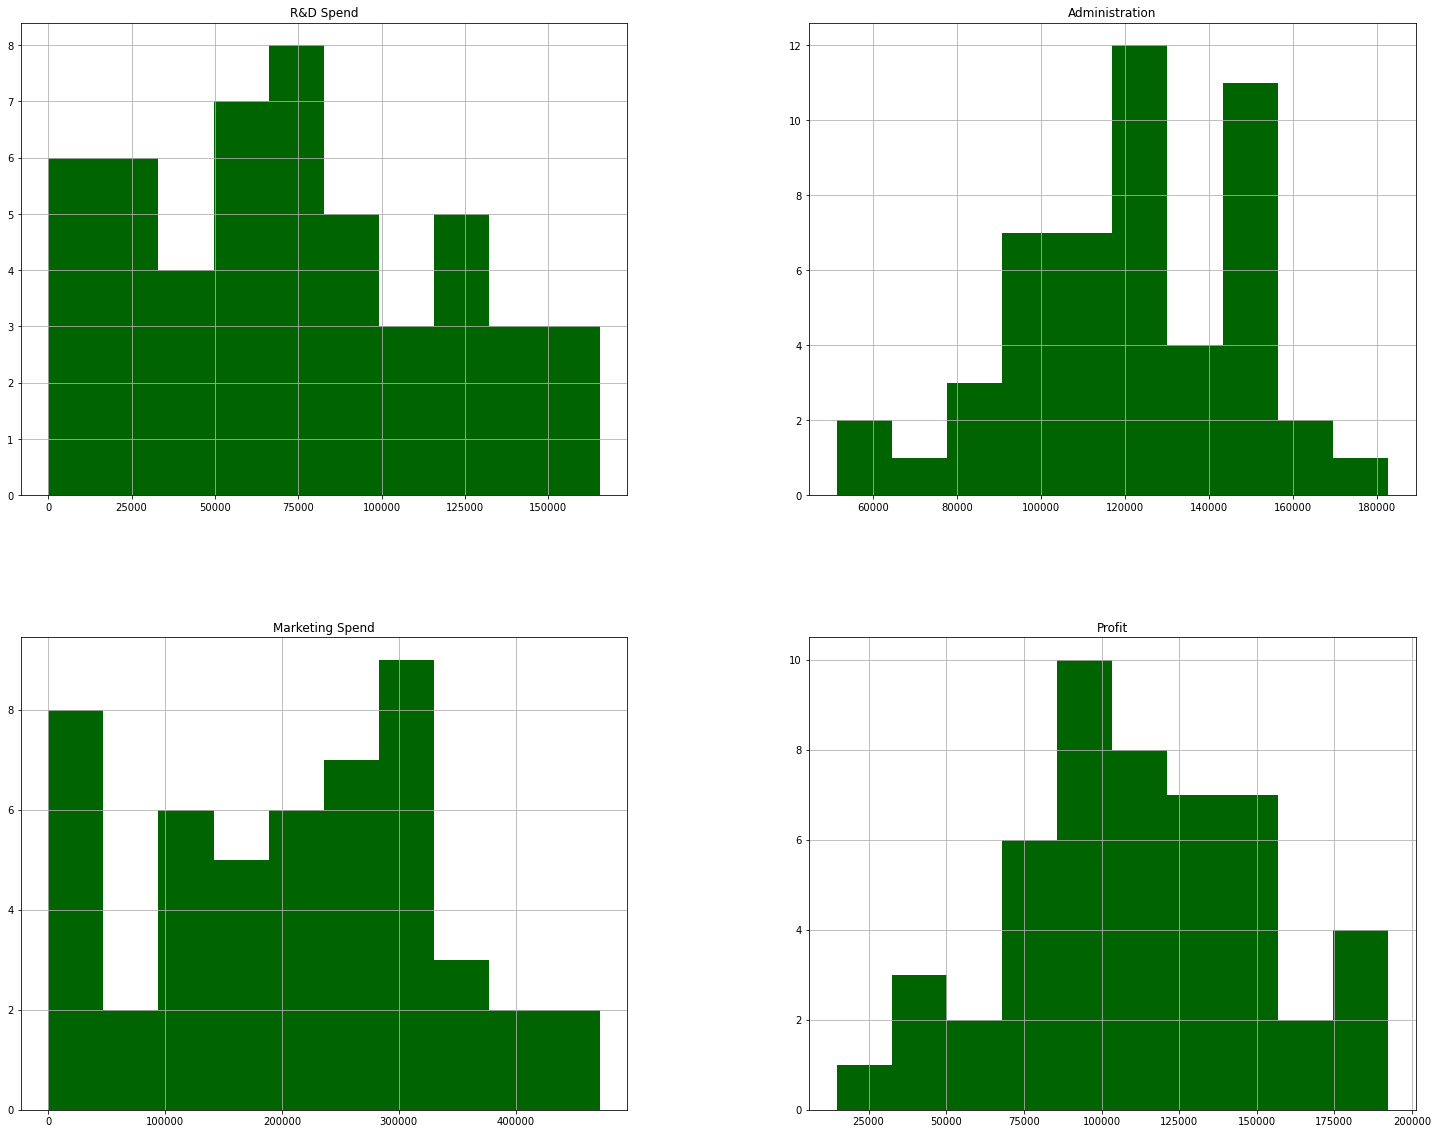

In [10]:
df.hist(figsize=(25,20),color="darkgreen")

# Let's display the key statistics values of the data frame.

In [11]:
#Transpose index and columns.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


# Let's display the unique values of the state.

In [12]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

Let's make categorical attribute inferences for State with the help of get_dummies. Because States do not have superiority over each other, they are nominals. It's not an ordinal.

In [13]:
df['State'] = pd.Categorical(df['State'])

In [14]:
dfDummies = pd.get_dummies(df['State'])

In [15]:
dfDummies.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [16]:
df = pd.concat([df,dfDummies],axis = 1)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


# Let's update our data frame by deleting the State attribute and excluding one of the States created as dummy.

In [17]:
df = df.drop(['State', "Florida"], axis = 1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,0,0


# Let's divide our data frame into dependent and independent variables.

In [18]:
x = df.drop("Profit", axis = 1)
y = df["Profit"]

# Let's check the dependent and independent variables.

In [19]:
x.head()

,R&D Spend,Administration,Marketing Spend,California,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,0,0


In [20]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

# Let's create 4 parts, train and test, from these dependent and independent variables. Let's use train_test_split to do this.

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40, shuffle=1)

# Let's check the 4 part variables.

In [22]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,California,New York
16,78013.11,121597.55,264346.06,1,0
35,46014.02,85047.44,205517.64,0,1
25,64664.71,139553.16,137962.62,1,0
21,78389.47,153773.43,299737.29,0,1
44,22177.74,154806.14,28334.72,1,0


In [23]:
x_test.head()

,R&D Spend,Administration,Marketing Spend,California,New York
33,55493.95,103057.49,214634.81,0,0
29,65605.48,153032.06,107138.38,0,1
49,0.00,116983.80,45173.06,1,0
38,20229.59,65947.93,185265.10,0,1
45,1000.23,124153.04,1903.93,0,1


In [24]:
y_train.head()

16    126992.93
35     96479.51
25    107404.34
21    111313.02
44     65200.33
Name: Profit, dtype: float64

In [25]:
y_test.head()

33     96778.92
29    101004.64
49     14681.40
38     81229.06
45     64926.08
Name: Profit, dtype: float64

# Let's include LinearRegression and build the model.

In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

# Let's give the training data generated from the dependent and independent variables to train the model.

In [27]:
model = lm.fit(x_train, y_train)

# Let's make the model predict the dependent test variable that it has not seen before. Let's assign these prediction values to the y_pred variable.

In [28]:
y_pred = lm.predict(x_test)
y_pred

array([ 97886.52854489, 100689.59753429,  50766.18448373,  66829.09134734,
        46799.45010527, 189232.29587132, 128691.24829828, 170348.90916942,
       135737.68395059, 180434.30891561])

# Let's collect the estimates and actual values in a data frame and take a look at it.

In [29]:
df_comp = pd.DataFrame({'Actual Values': y_test, 'Estimated Values': y_pred})
df_comp

,Actual Values,Estimated Values
33,96778.92,97886.528545
29,101004.64,100689.597534
49,14681.40,50766.184484
38,81229.06,66829.091347
45,64926.08,46799.450105
0,192261.83,189232.295871
18,124266.90,128691.248298
4,166187.94,170348.909169
11,144259.40,135737.683951
2,191050.39,180434.308916


In [30]:
df_comp.corr()

,Actual Values,Estimated Values
Actual Values,1.000000,0.965391
Estimated Values,0.965391,1.000000


# Let's include the metrics hosted by sklearn in the kernel and display their values

In [31]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)
print("Mean Square Error (MSE): " , MSE)

Mean Square Error (MSE):  207075894.95665073


In [32]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_pred)
print("Average Absolute Error (MAE): ", MAE)

Average Absolute Error (MAE):  10078.668277189885


In [33]:
import math

RMSE = math.sqrt(MSE)
print('Root Mean Square Error (RMSE) :',RMSE )

Root Mean Square Error (RMSE) : 14390.13186029408


# Let's print the Root Squared value of the model over the training data.

In [34]:
model.score(x_train, y_train)

0.9594857796904854

# Thank you